# Trabalho remoto e saúde 🌍🧠 mental

### Sobre o conjunto de dados

À medida que o trabalho remoto se torna a nova norma, é essencial entender seu impacto no bem-estar mental dos funcionários. Este conjunto de dados analisa como o trabalho remoto afeta os níveis de estresse, o equilíbrio entre vida profissional e pessoal e as condições de saúde mental em vários setores e regiões.

Com 5.000 registros coletados de funcionários em todo o mundo, esse conjunto de dados fornece informações valiosas sobre áreas-chave, como local de trabalho (remoto, híbrido, no local), níveis de estresse, acesso a recursos de saúde mental e satisfação no trabalho. Ele foi projetado para ajudar pesquisadores, profissionais de RH e empresas a avaliar a crescente influência do trabalho remoto na produtividade e no bem-estar. 🌿📈

### Objetivos

###### 1 - Existe uma correlação entre o tipo de local de trabalho (remoto, híbrido, no local) e o nível de estresse dos funcionários?
###### 2 - Quais indústrias têm os maiores níveis de estresse entre os funcionários?
###### 3 - O gênero tem algum impacto no nível de estresse relatado?
###### 4 - Funcionários que relatam condições de saúde mental têm níveis mais altos de estresse?
###### 5 - Como a idade dos funcionários afeta o nível de estresse, considerando o tipo de local de trabalho?
###### 6 - O sentimento de isolamento social impacta diretamente o nível de estresse?
###### 7 - Funcionários que estão satisfeitos com o trabalho remoto relatam níveis mais baixos de estresse em comparação aos que estão insatisfeitos?
###### 8 - Os funcionários que têm acesso a recursos de saúde mental apresentam níveis mais baixos de estresse?

#### Metodologia

Neste estudo, utilizaremos o algoritmo Naive Bayes para realizar a predição do nível de estresse. A escolha por esse modelo se deve ao seu bom desempenho em situações com muitas variáveis categóricas de valores discretos, como em problemas de segmentação de clientes. No entanto, uma possível limitação desse modelo é que ele assume que todas as variáveis são independentes, o que, na prática, pode não ser verdade.

Por exemplo, podemos suspeitar que as variáveis Satisfaction_with_Remote_Work e Social_Isolation_Rating estão relacionadas entre si, o que violaria o pressuposto de independência do Naive Bayes. Até o momento, essa relação é apenas uma inferência baseada no significado das variáveis, mas poderemos tomar decisões mais informadas à medida que avançarmos na análise dos dados.

#### Importação de Pacotes

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#### Importação de dados

In [224]:
dados = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv', sep = ',')
dados.head(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,None,No,Increase,5,Unsatisfied,1,None,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,None,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,None,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


#### Data Warilling

In [225]:
dados.rename(columns=
             {
                 'Employee_ID':'IdColaborador',
                 'Age':'Idade',
                 'Job_Role':'Função',
                 'Industry':'Industria',
                 'Years_of_Experience':'AnosDeExperiencia',
                 'Work_Location':'TipoDeTrabalho',
                 'Hours_Worked_Per_Week':'HorasSemanais',
                 'Number_of_Virtual_Meetings':'QtdReunioes',
                 'Work_Life_Balance_Rating':'EquilibroVidaTrabalho',
                 'Stress_Level':'NivelEstresse',
                 'Mental_Health_Condition':'CondicoesMentais',
                 'Access_to_Mental_Health_Resources':'PlanoDeSaude',
                 'Productivity_Change':'MudancaProdutividade',
                 'Social_Isolation_Rating':'NotaDeIsolamentoSocial',
                 'Satisfaction_with_Remote_Work':'SatisfacaoComTrabalhoRemoto',
                 'Company_Support_for_Remote_Work':'SuporteDaEmpresaComTrabalhoRemoto',
                 'Physical_Activity':'AtividadeFisica',
                 'Sleep_Quality':'QualidadeSono',
                 'Region':'Regiao'
             }, inplace= True)

dados.head()  ## O Objetivo aqui foi facilitar o entendimento para lingua nativa do brasil - The objective here was to facilitate understanding in the native language of Brazil.

,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,NivelEstresse,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


#### Descritiva

In [226]:
dados.isnull().sum()

IdColaborador                        0
Idade                                0
Gender                               0
Função                               0
Industria                            0
AnosDeExperiencia                    0
TipoDeTrabalho                       0
HorasSemanais                        0
QtdReunioes                          0
EquilibroVidaTrabalho                0
NivelEstresse                        0
CondicoesMentais                     0
PlanoDeSaude                         0
MudancaProdutividade                 0
NotaDeIsolamentoSocial               0
SatisfacaoComTrabalhoRemoto          0
SuporteDaEmpresaComTrabalhoRemoto    0
AtividadeFisica                      0
QualidadeSono                        0
Regiao                               0
dtype: int64

In [227]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   IdColaborador                      5000 non-null   object
 1   Idade                              5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Função                             5000 non-null   object
 4   Industria                          5000 non-null   object
 5   AnosDeExperiencia                  5000 non-null   int64 
 6   TipoDeTrabalho                     5000 non-null   object
 7   HorasSemanais                      5000 non-null   int64 
 8   QtdReunioes                        5000 non-null   int64 
 9   EquilibroVidaTrabalho              5000 non-null   int64 
 10  NivelEstresse                      5000 non-null   object
 11  CondicoesMentais                   5000 non-null   object
 12  PlanoD

In [228]:
dados.describe()

,Idade,AnosDeExperiencia,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,NotaDeIsolamentoSocial,SuporteDaEmpresaComTrabalhoRemoto
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


#### 1 - Existe uma correlação entre o tipo de local de trabalho (remoto, híbrido, no local) e o nível de estresse dos funcionários?

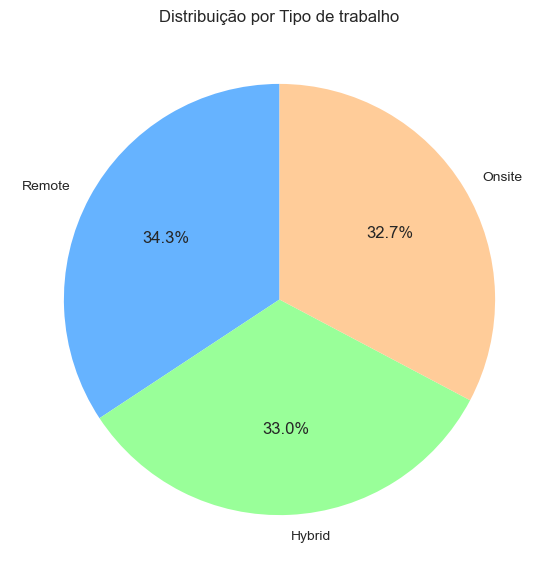

In [229]:
# Contar a quantidade de linhas por local de trabalho
tipo_trabalho = dados['TipoDeTrabalho'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(tipo_trabalho, labels=tipo_trabalho.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribuição por Tipo de trabalho')
plt.show()

In [230]:
def hist(df, col):
    plt.figure(figsize=(10,10))
    sns.histplot(data = df[col], kde=True, bins=30, color='darkviolet')
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Frequência', fontsize=16)
    plt.show()

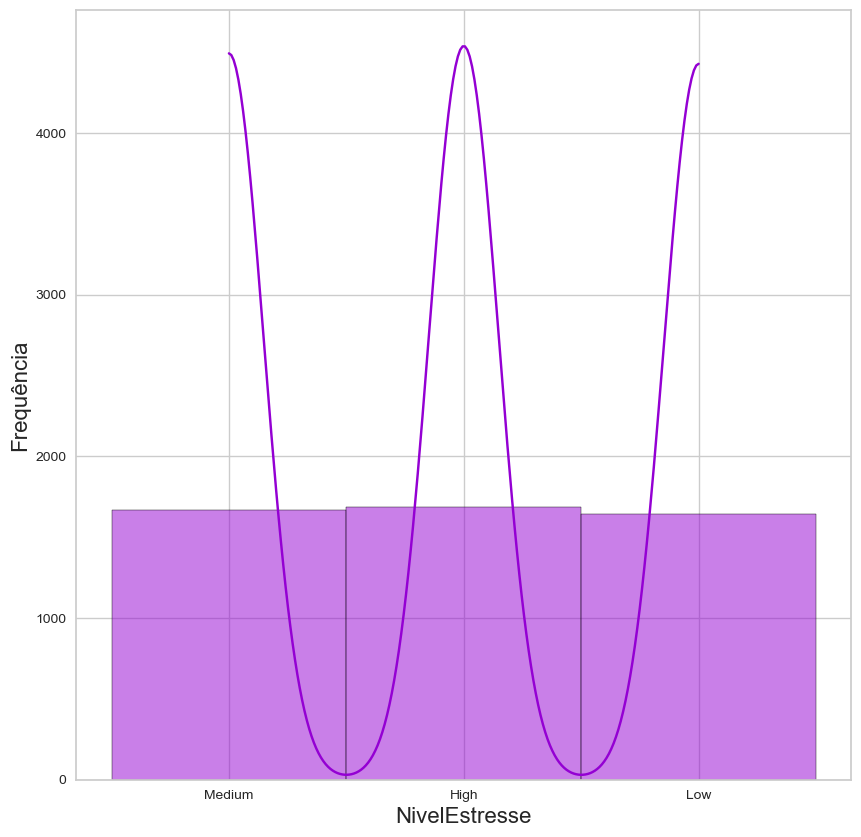

In [231]:
hist(dados,'NivelEstresse')

In [232]:
dados['NivelEstresse'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [233]:
estresse_alto = dados[dados['NivelEstresse'] == 'High'].shape[0]
estresse_alto_e_remoto = dados[(dados['NivelEstresse'] == 'High') & (dados['TipoDeTrabalho'] == 'Remote')].shape[0]
estresse_alto_e_presencial = dados[(dados['NivelEstresse'] == 'High') & (dados['TipoDeTrabalho'] == 'Onsite')].shape[0]
estresse_alto_e_hibrido = dados[(dados['NivelEstresse'] == 'High') & (dados['TipoDeTrabalho'] == 'Hybrid')].shape[0]


print('Estresse Alto: ', estresse_alto)
print('Estresse Alto e remoto: ', estresse_alto_e_remoto)
print('Estresse Alto e presencial: ', estresse_alto_e_presencial)
print('Estresse Alto e hibrido: ', estresse_alto_e_hibrido)

Estresse Alto:  1686
Estresse Alto e remoto:  590
Estresse Alto e presencial:  535
Estresse Alto e hibrido:  561


##### OBS:

Notamos que a maior interseção ocorre entre Estresse Alto e Trabalho Remoto, com um total de 590 ocorrências. No entanto, não podemos ainda afirmar estatisticamente que existe uma correlação entre essas variáveis. Para isso, será necessário realizar um teste apropriado.

Como estamos lidando com variáveis categóricas, não podemos utilizar o Teste de Correlação de Pearson, pois ele requer variáveis numéricas. Nesse caso, optaremos pela Análise de Correspondência, que permitirá verificar se existe alguma dependência ou associação significativa entre essas variáveis.

In [234]:
# ---- TESTE DE QUI-QUADRADO ----

# Criar tabela de contingência
contingencia = pd.crosstab(dados['NivelEstresse'], dados['TipoDeTrabalho'])

chi2, p, dof, expected = stats.chi2_contingency(contingencia)

print(f"Valor Qui-Quadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Graus de Liberdade: {dof}")
print(f"Frequências esperadas:\n{expected}")

# Verifica se o p-valor é significativo (alpha = 0.05)
if p < 0.05:
    print("Há evidências suficientes para rejeitar a hipótese nula. Existe associação significativa entre NivelEstresse e TipoDeTrabalho.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. Não existe associação significativa entre NivelEstresse e TipoDeTrabalho.")


Valor Qui-Quadrado: 1.9222972163719598
P-valor: 0.7500478443616598
Graus de Liberdade: 4
Frequências esperadas:
[[556.0428 551.9964 577.9608]
 [542.521  538.573  563.906 ]
 [550.4362 546.4306 572.1332]]
Não há evidências suficientes para rejeitar a hipótese nula. Não existe associação significativa entre NivelEstresse e TipoDeTrabalho.


In [235]:
# Inicializar o modelo de Análise de Correspondência
ca = prince.CA(n_components=2)

# Ajustar o modelo à tabela de contingência
ca = ca.fit(contingencia)

# Exibir as coordenadas das linhas e colunas
row_coords = ca.row_coordinates(contingencia)
col_coords = ca.column_coordinates(contingencia)

print("Row Coordinates:\n", row_coords)
print("Column Coordinates:\n", col_coords)

Row Coordinates:
                       0         1
NivelEstresse                    
High          -0.021636 -0.004151
Low            0.024570 -0.003045
Medium        -0.002360  0.007194
Column Coordinates:
                        0         1
TipoDeTrabalho                    
Hybrid         -0.002648 -0.007253
Onsite          0.024849  0.002942
Remote         -0.021185  0.004168


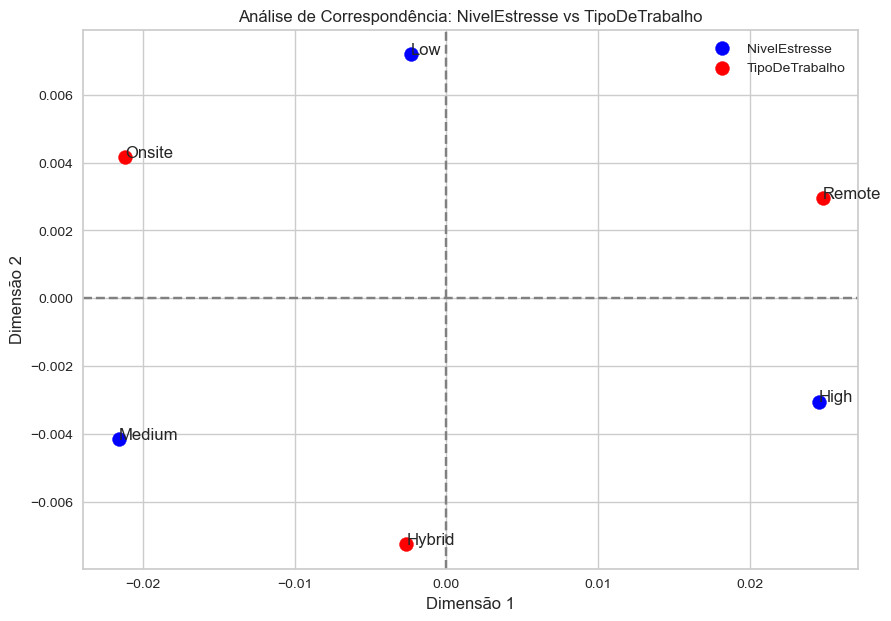

In [236]:
# Plotar coordenadas das linhas (NivelEstresse)
plt.figure(figsize=(10, 7))

# Plotando as categorias do 'NivelEstresse'
for i, (x, y) in enumerate(row_coords.values):
    plt.scatter(x, y, color='blue', label='NivelEstresse' if i == 0 else "", s=100)
    plt.text(x, y, dados['NivelEstresse'].unique()[i], fontsize=12)

# Plotando as categorias do 'TipoDeTrabalho'
for i, (x, y) in enumerate(col_coords.values):
    plt.scatter(x, y, color='red', label='TipoDeTrabalho' if i == 0 else "", s=100)
    plt.text(x, y, dados['TipoDeTrabalho'].unique()[i], fontsize=12)

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Análise de Correspondência: NivelEstresse vs TipoDeTrabalho')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.legend()
plt.show()


#### Resposta 1

Após a verificação, podemos afirmar que, estatisticamente, não há associação significativa entre essas duas variáveis. Portanto, não podemos concluir que o modelo de trabalho (remoto ou não) seja um fator determinante para o nível de estresse de uma pessoa. Essas variáveis, isoladamente, não são suficientes para prever se alguém estará mais ou menos estressado.

#### 2 - Quais indústrias têm os maiores níveis de estresse entre os funcionários?

##### OBS:

O gestor deseja ver apenas a quantidade por indústria, algo que podemos representar facilmente com um gráfico de barras simples, mostrando a quantidade para cada setor.

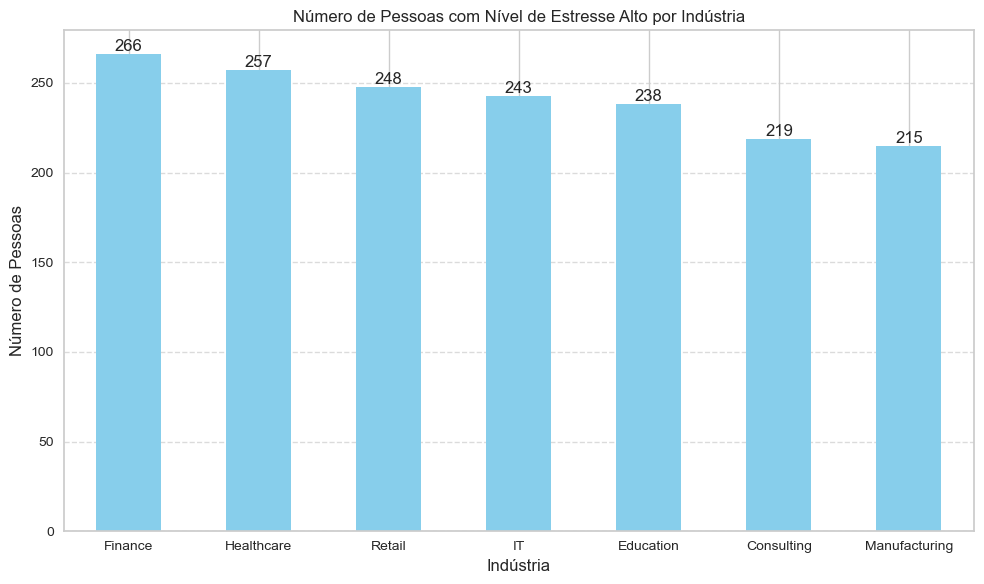

In [237]:
# Filtrar os dados para incluir apenas aqueles com NivelEstresse == 'Alto'
dados_high_stress = dados[dados['NivelEstresse'] == 'High']

# Contar o número de pessoas com NivelEstresse 'Alto' por Indústria
contagem = dados_high_stress['Industria'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = contagem.plot(kind='bar', color='skyblue')
plt.title('Número de Pessoas com Nível de Estresse Alto por Indústria')
plt.xlabel('Indústria')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)

# Adicionar números em cima das barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             int(bar.get_height()), 
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar layout
plt.show()

##### Obs:

Notamos que o setor Finance possui o maior número absoluto de pessoas no nível mais estressado. No entanto, é importante também analisarmos os valores para o nível Medium, por exemplo.

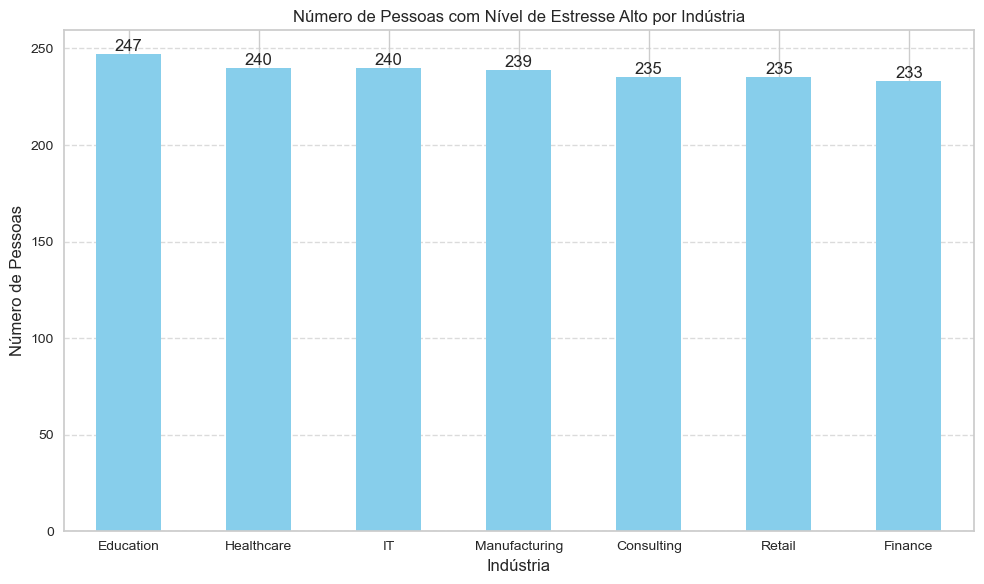

In [238]:
# Filtrar os dados para incluir apenas aqueles com NivelEstresse == 'Medium'
dados_Medium_stress = dados[dados['NivelEstresse'] == 'Medium']

# Contar o número de pessoas com NivelEstresse 'Alto' por Indústria
contagem = dados_Medium_stress['Industria'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = contagem.plot(kind='bar', color='skyblue')
plt.title('Número de Pessoas com Nível de Estresse Alto por Indústria')
plt.xlabel('Indústria')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)

# Adicionar números em cima das barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             int(bar.get_height()), 
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar layout
plt.show()

##### Obs:

Podemos observar que o setor Finance ocupa a última colocação quando analisamos os níveis de estresse. Portanto, seria útil calcular o percentual de pessoas estressadas por setor em relação ao número total de trabalhadores. Essa abordagem nos permitirá identificar onde está o maior foco de estresse.

Se o RH planeja realizar uma roda de palestras ou ações similares e deseja atingir o maior número de pessoas, o setor Finance pode ser uma prioridade. No entanto, se o objetivo é entender o clima organizacional de cada setor, é mais eficaz analisar os dados de forma proporcional.

In [239]:
dados[(dados['Industria'] == 'Finance') & (dados['NivelEstresse'] == 'High')].shape[0] / dados[dados['Industria'] == 'Finance'].shape[0]

0.35609103078982596

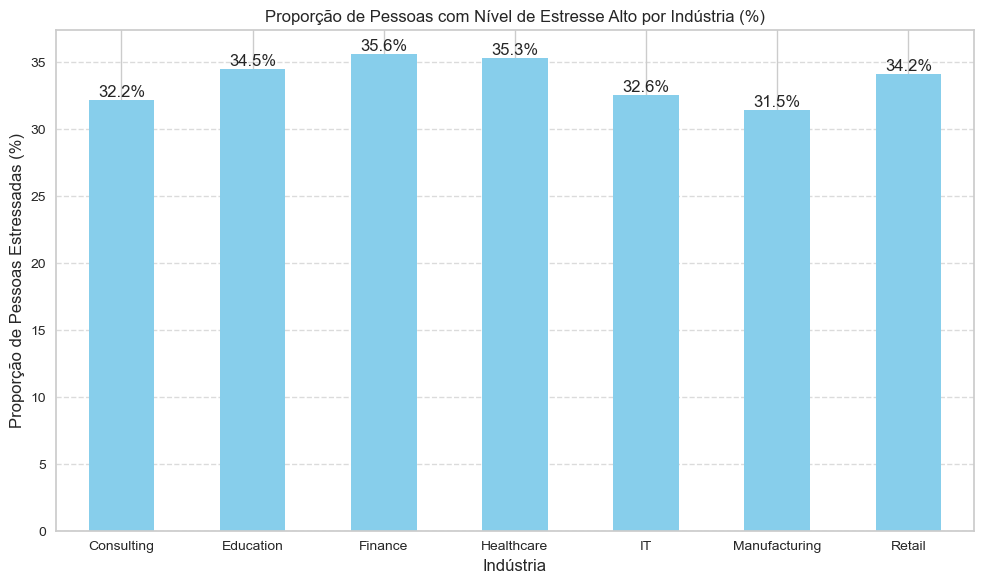

In [240]:
# Contar o total de pessoas por setor
total_por_industria = dados['Industria'].value_counts()

# Contar o número de pessoas com NivelEstresse 'Alto' por Indústria
contagem_alta = dados[dados['NivelEstresse'] == 'High']['Industria'].value_counts()

# Calcular a proporção de pessoas estressadas
proporcao = (contagem_alta / total_por_industria) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = proporcao.plot(kind='bar', color='skyblue')
plt.title('Proporção de Pessoas com Nível de Estresse Alto por Indústria (%)')
plt.xlabel('Indústria')
plt.ylabel('Proporção de Pessoas Estressadas (%)')
plt.xticks(rotation=0)

# Adicionar números em cima das barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{bar.get_height():.1f}%", 
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar layout
plt.show()

##### Resposta 2

O setor Finance apresenta o maior número de pessoas estressadas, tanto em termos absolutos quanto proporcionais. Contudo, é importante notar que, proporcionalmente, todos os setores têm cerca de 3 a cada 10 funcionários com o mesmo nível de estresse. Não temos uma linha de base definida para determinar se esses valores são alarmantes ou não.

Outro ponto a ser considerado é que o estresse é medido por meio de uma nota, tornando a pesquisa subjetiva. O que representa estresse para uma pessoa (A) pode ser diferente para outra (B). Embora não possamos ignorar as experiências individuais, entendemos que elas são influenciadas por fatores distintos, e isso não pode ser metrificado. Às vezes, o que é uma solução para um indivíduo pode ser o ápice do estresse para outro. É importante ressaltar que essas são inferências pessoais, e não temos como verificar isso com os dados disponíveis até agora.

#### 3 - O gênero tem algum impacto no nível de estresse relatado?

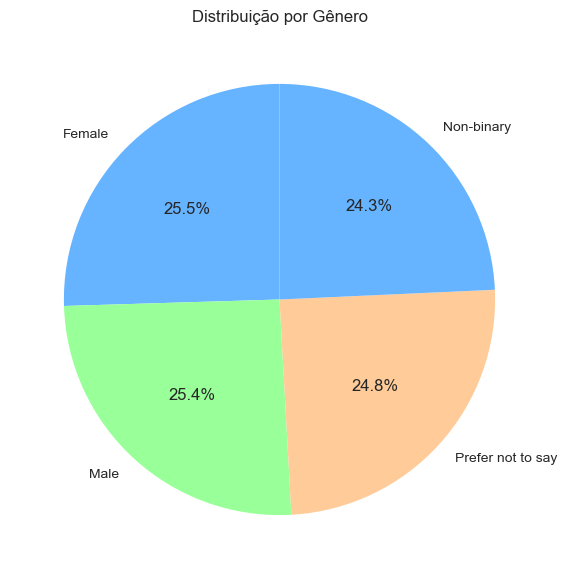

In [241]:
# Contar a quantidade de linhas por Churn
genero_counts = dados['Gender'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribuição por Gênero')
plt.show()

##### Obs:

No nosso banco de dados, existem quatro opções para gênero, sendo que uma delas é "Prefiro não responder", que foi escolhida por aproximadamente 25% dos respondentes. Isso significa que 1 em cada 4 pessoas não respondeu a essa pergunta. Em relação à nossa terceira pergunta, essa opção pode comprometer a análise. Portanto, vamos excluir todos os respondentes que não responderam para que possamos fornecer uma resposta mais clara à dúvida do gestor.

In [242]:
dados['Gender'].unique()

array(['Non-binary', 'Female', 'Male', 'Prefer not to say'], dtype=object)

In [243]:
genero = dados[dados['Gender'] != 'Prefer not to say']
genero.head()

,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,NivelEstresse,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


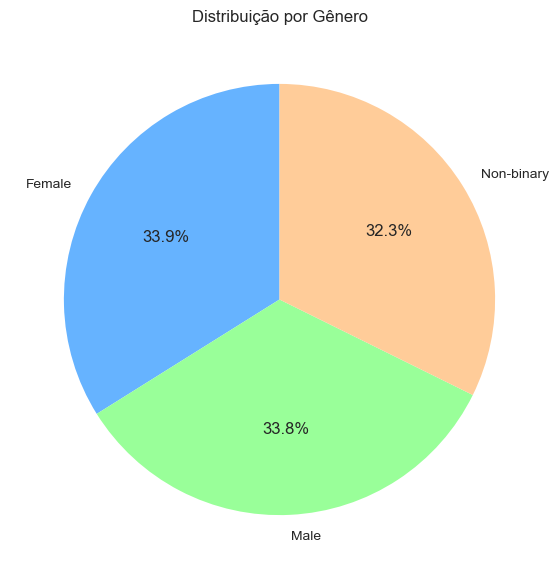

In [244]:
# Contar a quantidade de linhas por genero
genero_counts = genero['Gender'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribuição por Gênero')
plt.show()

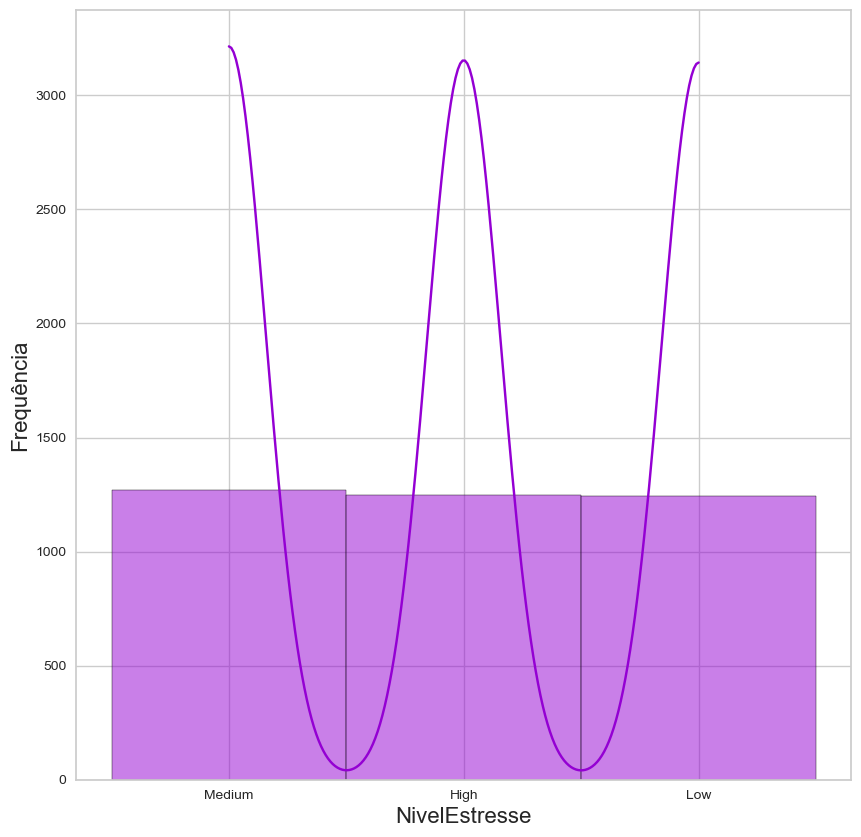

In [245]:
hist(genero,'NivelEstresse')

##### Obs:

Para os propósitos desta análise, vou atribuir valores numéricos ao gênero, permitindo que possamos calcular a correlação. No entanto, é importante ressaltar que essa abordagem é aplicada apenas para esta questão específica.

Durante a modelagem, não utilizarei essa atribuição, uma vez que estamos lidando com um modelo que compreende variáveis categóricas. Mesmo que o modelo não entendesse essas categorias, o mais adequado seria usar técnicas como get_dummies para evitar a ponderação arbitrária, que atribui pesos a palavras de forma imprecisa.

In [246]:
genero['Gender'].unique()

array(['Non-binary', 'Female', 'Male'], dtype=object)

In [247]:
# Mapear valores
mapping = {
    'Non-binary': 0,
    'Female': 1,
    'Male': 2
}

genero['Gender_Numeric'] = genero['Gender'].map(mapping)
genero.head()                 

C:\Users\bruno\AppData\Local\Temp\ipykernel_36756\3907140333.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genero['Gender_Numeric'] = genero['Gender'].map(mapping)


,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,...,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao,Gender_Numeric
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,0
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,1
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America,0
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe,2
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,2


In [248]:
# Mapear valores
mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

genero['NivelEstresse_Numeric'] = genero['NivelEstresse'].map(mapping)
genero.head()  

C:\Users\bruno\AppData\Local\Temp\ipykernel_36756\576612458.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genero['NivelEstresse_Numeric'] = genero['NivelEstresse'].map(mapping)


,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,...,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao,Gender_Numeric,NivelEstresse_Numeric
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,0,1
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,No,Increase,3,Satisfied,2,Weekly,Good,Asia,1,1
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,No,No Change,4,Unsatisfied,5,None,Poor,North America,0,1
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe,2,2
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,2,2


In [249]:
correlacao = genero['Gender_Numeric'].corr(genero['NivelEstresse_Numeric'])

print(f'A correlação entre Genero e NivelEstresse é: {correlacao:.2f}')

A correlação entre Genero e NivelEstresse é: -0.02


##### Resposta 3:

A correlação de Pearson varia de -1 a +1. Os extremos indicam uma correlação perfeita: um valor positivo significa que, quando uma variável cresce, a outra também cresce, e um valor negativo indica que, quando uma variável cresce, a outra diminui. O que realmente nos interessa é determinar se existe uma correlação significativa entre os valores, ou seja, se o valor A de alguma forma afeta o valor B.

No nosso caso, a correlação foi de -0.02, o que tende a zero. De maneira simplificada, isso significa que uma variável não influencia a outra.



#### 4 - Funcionários que relatam condições de saúde mental têm níveis mais altos de estresse?

In [250]:
dados.head()

,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,NivelEstresse,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [251]:
dados['CondicoesMentais'].unique()

array(['Depression', 'Anxiety', 'None', 'Burnout'], dtype=object)

##### Obs:

A pergunta parte do pressuposto de que temos uma divisão entre pessoas que relataram algum problema de saúde mental e aquelas que não relataram nenhum. Dessa forma, vamos avaliar se ter um problema prévio altera o nível de estresse. Para isso, iremos agrupar as categorias 'Depression', 'Anxiety' e 'Burnout' como 1, enquanto 'None' será representado como 0.

In [252]:
pergunt4 = dados.copy()

# Mapear valores
mapping = {
    'Depression': 1,
    'Anxiety': 1,
    'Burnout': 1,
    'None':0
}

pergunt4['CondicoesMentais_Numeric'] = pergunt4['CondicoesMentais'].map(mapping)
pergunt4.head()  

,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,...,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao,CondicoesMentais_Numeric
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,1
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,1
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America,1
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe,1
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,0


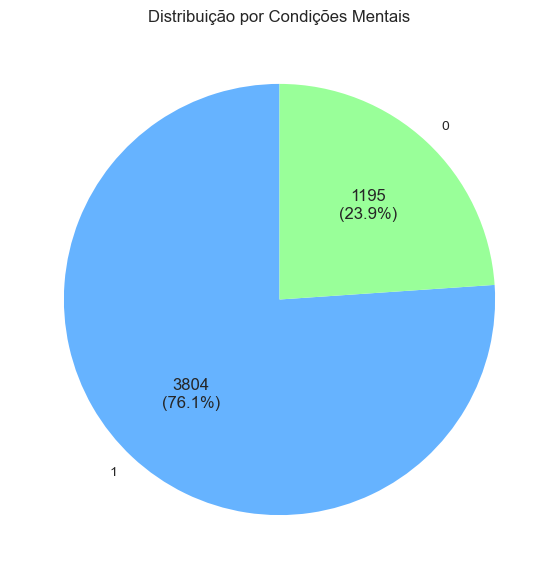

In [253]:
# Contar a quantidade de linhas por CondicoesMentais
pergunt4_counts = pergunt4['CondicoesMentais_Numeric'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7, 7))

# Função para formatar os rótulos
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}\n({pct:.1f}%)'

# Criar o gráfico de pizza
plt.pie(pergunt4_counts, labels=pergunt4_counts.index, autopct=lambda pct: func(pct, pergunt4_counts), 
        startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])

plt.title('Distribuição por Condições Mentais')
plt.show()

##### Obs:

O gráfico revelou que 3 a cada 4 funcionários alegaram ter algum problema de saúde mental, indicando um desbalanceamento nos dados. Embora possamos esperar que a quantidade total de pessoas que relataram problemas seja maior, é importante também analisar esses valores de forma proporcional para confirmar a diferença entre os grupos.

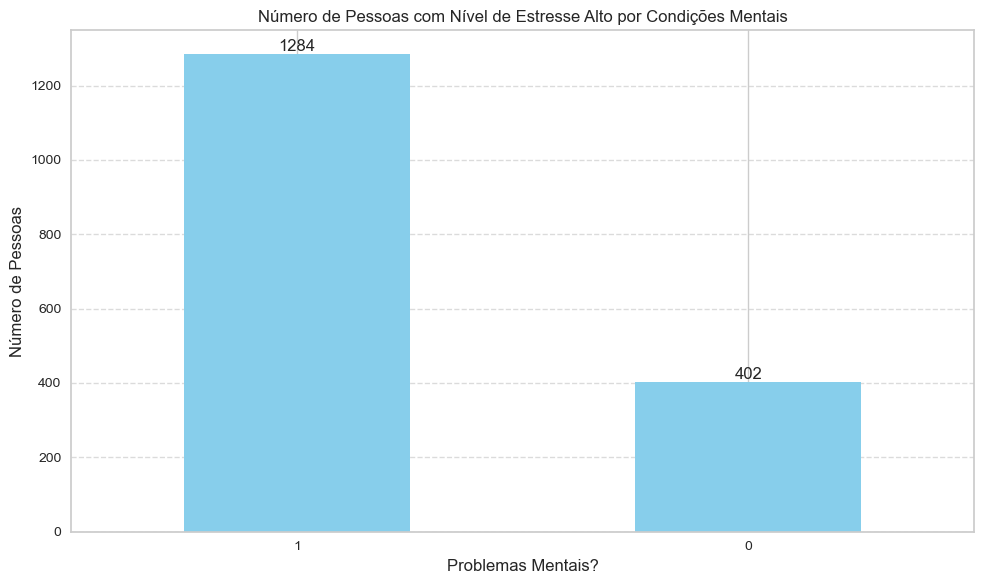

In [254]:
# Filtrar os dados para incluir apenas aqueles com NivelEstresse == 'Medium'
pergunt4_counts = pergunt4[pergunt4['NivelEstresse'] == 'High']

# Contar o número de pessoas com NivelEstresse 'Alto' por Indústria
contagem = pergunt4_counts['CondicoesMentais_Numeric'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = contagem.plot(kind='bar', color='skyblue')
plt.title('Número de Pessoas com Nível de Estresse Alto por Condições Mentais')
plt.xlabel('Problemas Mentais?')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)

# Adicionar números em cima das barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             int(bar.get_height()), 
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar layout
plt.show()



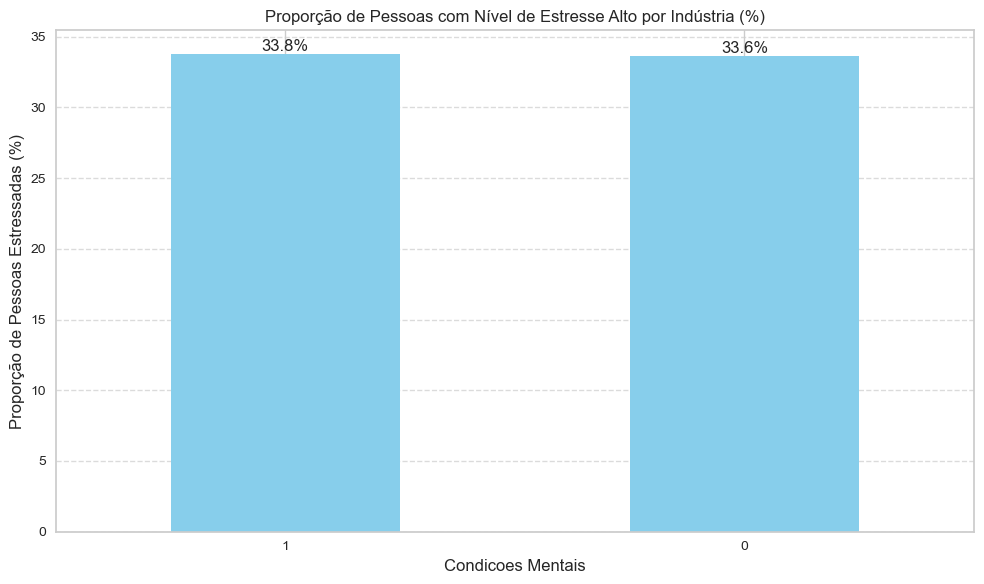

In [255]:
# Contar o total de pessoas por setor
total_por_CondicoesMentais_Numeric = pergunt4['CondicoesMentais_Numeric'].value_counts()

# Contar o número de pessoas com NivelEstresse 'Alto' por Indústria
contagem_alta = pergunt4[pergunt4['NivelEstresse'] == 'High']['CondicoesMentais_Numeric'].value_counts()

# Calcular a proporção de pessoas estressadas
proporcao = (contagem_alta / total_por_CondicoesMentais_Numeric) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = proporcao.plot(kind='bar', color='skyblue')
plt.title('Proporção de Pessoas com Nível de Estresse Alto por Indústria (%)')
plt.xlabel('Condicoes Mentais')
plt.ylabel('Proporção de Pessoas Estressadas (%)')
plt.xticks(rotation=0)

# Adicionar números em cima das barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{bar.get_height():.1f}%", 
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar layout
plt.show()

##### Obs:

Como esperado, o número de pessoas com problemas de saúde mental e alto nível de estresse foi significativamente maior: 3.804 pessoas relataram algum problema mental, enquanto 1.195 afirmaram não ter nenhum problema. Ao analisar o gráfico com o número de estressados, observamos uma diferença de 1.284 contra 402.

No entanto, já havíamos antecipado que, proporcionalmente, essa diferença poderia ser menos significativa, devido ao desbalanceamento das categorias. De fato, nossa percepção se confirmou, com um valor proporcional próximo ao observado nas indústrias, em torno de 30%, ou seja, 3 a cada 10 funcionários em ambos os grupos.

Para confirmar essa análise, vamos utilizar o teste Z de proporções, uma ferramenta estatística que compara a proporção de pessoas com e sem condições mentais em uma amostra.

In [256]:
def teste_proporcao(count1, n1, count2, n2):
    # Realiza o teste Z de proporções
    count = np.array([count1, count2])
    nobs = np.array([n1, n2])
    
    # Teste Z
    stat, pval = proportions_ztest(count, nobs)
    
    print(f'Estatística Z: {stat:.4f}')
    print(f'Valor-p: {pval:.4f}')
    
    # Interpretação
    if pval < 0.05:
        print("Há uma diferença significativa entre as proporções.")
    else:
        print("Não há diferença significativa entre as proporções.")


count1 = pergunt4[(pergunt4['CondicoesMentais_Numeric'] == 1) & (pergunt4['NivelEstresse'] == 'High')].shape[0]  # Pessoas com condições mentais indicadas e alto nível de estresse
n1 = pergunt4[pergunt4['CondicoesMentais_Numeric'] == 1].shape[0]      # Total de pessoas com condições mentais indicadas
count2 = pergunt4[(pergunt4['CondicoesMentais_Numeric'] == 0) & (pergunt4['NivelEstresse'] == 'High')].shape[0]  # Pessoas sem condições mentais indicadas e alto nível de estresse
n2 = pergunt4[pergunt4['CondicoesMentais_Numeric'] == 0].shape[0]     # Total de pessoas sem condições mentais indicadas

# Chama a função para realizar o teste Z
teste_proporcao(count1, n1, count2, n2)

Estatística Z: 0.0905
Valor-p: 0.9279
Não há diferença significativa entre as proporções.


##### Resposta 4:

Exatamente, ao analisarmos as proporções, confirmamos que não há uma diferença estatisticamente significativa entre os grupos. Ou seja, com base no banco de dados utilizado, não podemos afirmar que a presença de uma condição de saúde mental prévia é um fator determinante para prever se uma pessoa terá um nível de estresse elevado. Esse resultado ressalta a necessidade de aprofundar a análise, considerando outras variáveis e interações, que podem ter maior peso na determinação do estresse, em vez de confiar apenas em condições pré-existentes.

#### 5 - Como a idade dos funcionários afeta o nível de estresse, considerando o tipo de local de trabalho?

In [257]:
dados.head()

,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,NivelEstresse,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [258]:
dados['Idade'].describe()

count    5000.000000
mean       40.995000
std        11.296021
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Idade, dtype: float64

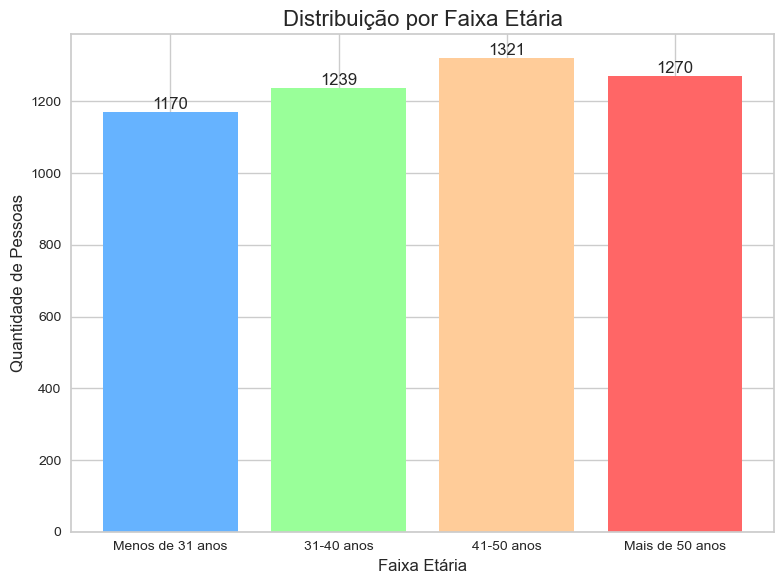

In [259]:
q1 = dados[dados['Idade'] < 31]
q2 = dados[(dados['Idade'] >= 31) & (dados['Idade'] < 41)]
q3 = dados[(dados['Idade'] >= 41) & (dados['Idade'] < 51)]
q4 = dados[dados['Idade'] >= 51]

# Valores das faixas etárias
faixas = ['Menos de 31 anos', '31-40 anos', '41-50 anos', 'Mais de 50 anos']
quantidades = [q1.shape[0], q2.shape[0], q3.shape[0], q4.shape[0]]

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(faixas, quantidades, color=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])

# Adicionando os valores no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Adicionando título e rótulos
plt.title('Distribuição por Faixa Etária', fontsize=16)
plt.ylabel('Quantidade de Pessoas', fontsize=12)
plt.xlabel('Faixa Etária', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


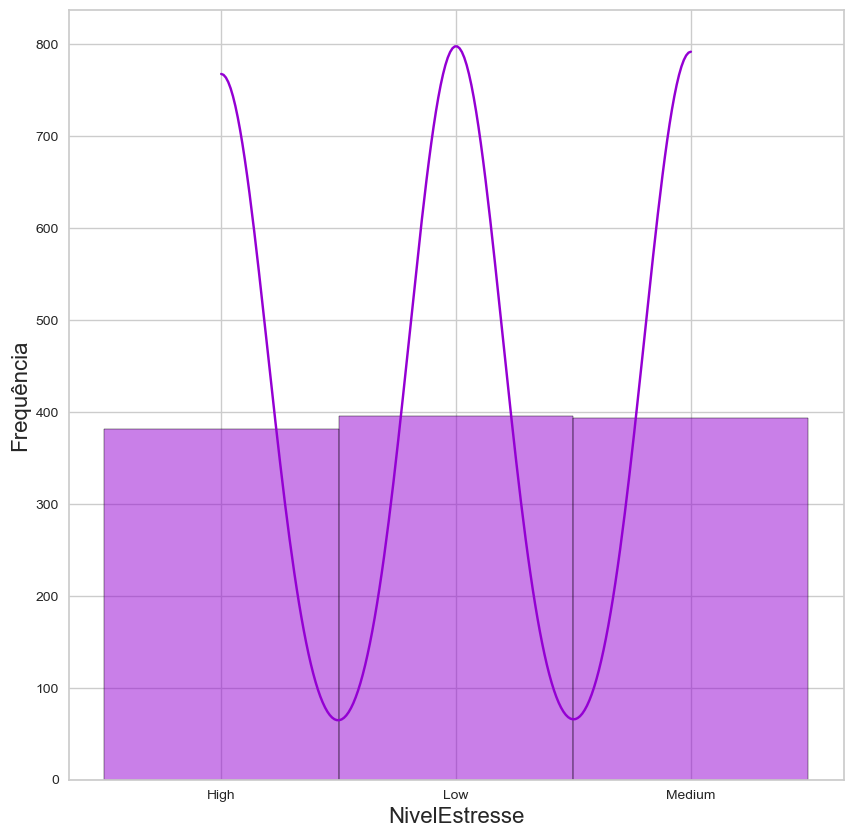

In [260]:
hist(q1,'NivelEstresse')

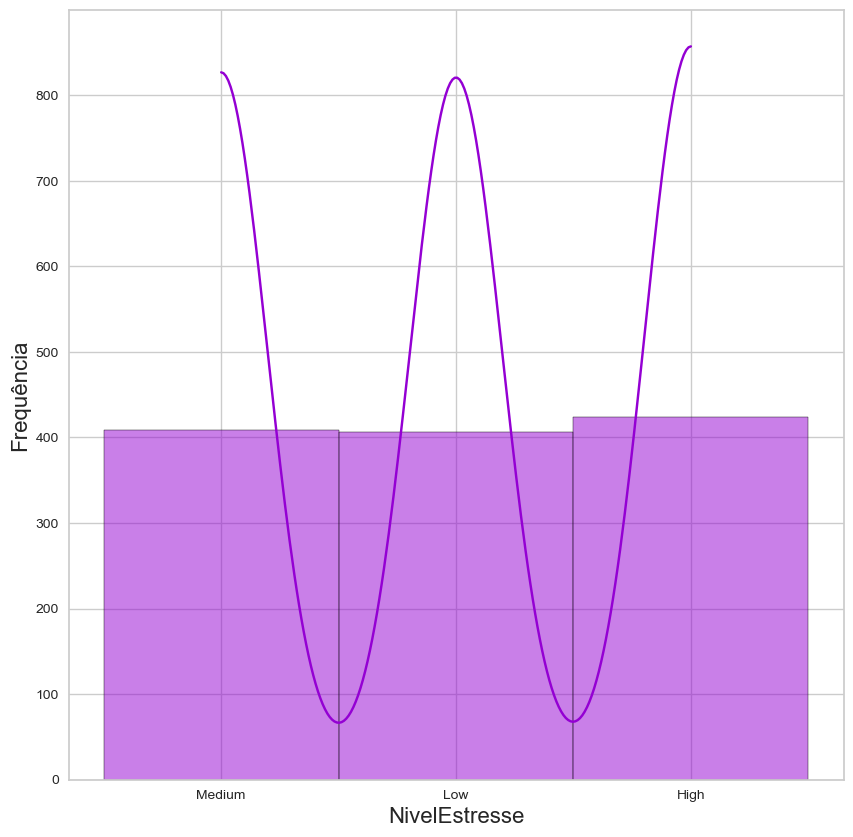

In [261]:
hist(q2,'NivelEstresse')

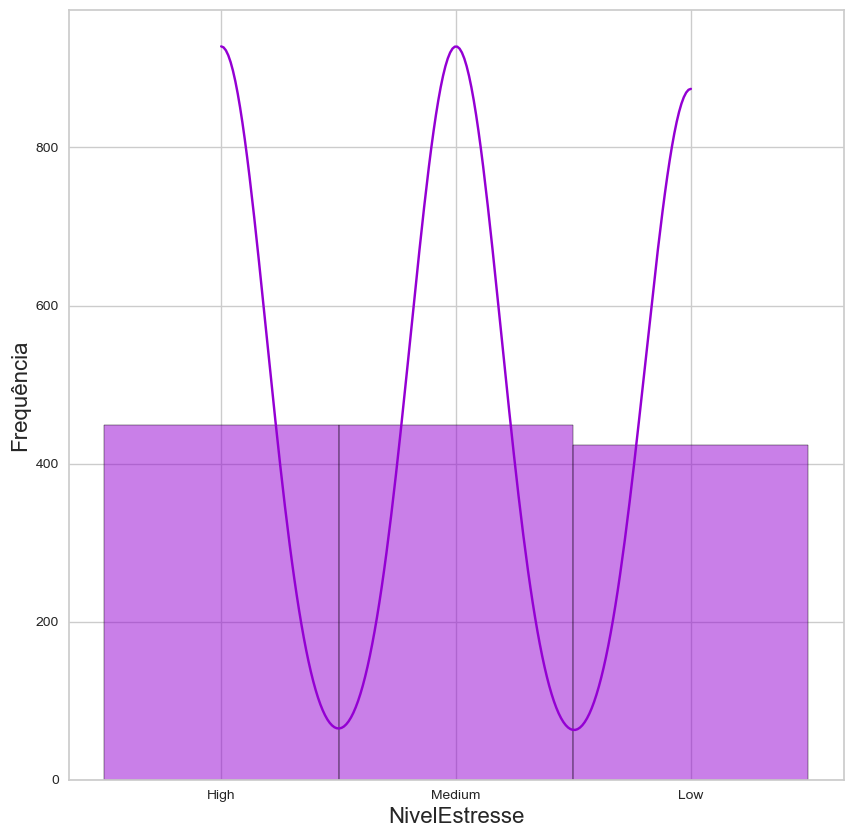

In [262]:
hist(q3,'NivelEstresse')

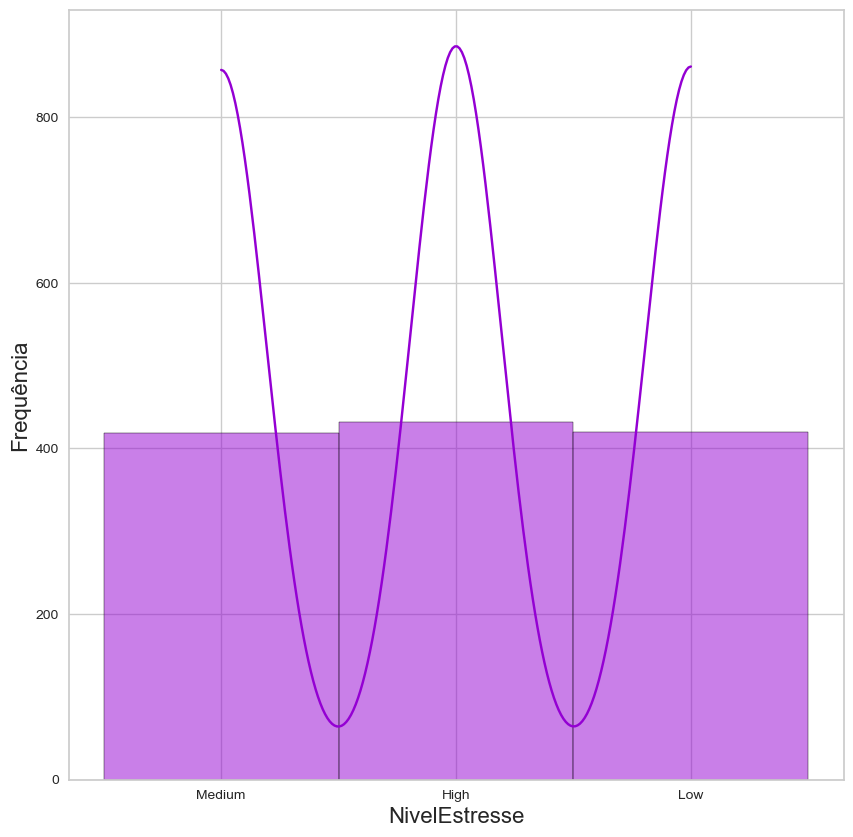

In [263]:
hist(q4,'NivelEstresse')

In [264]:
dados['NivelEstresse'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

##### Obs:

A ideia de utilizar um Modelo Logístico Multinomial é apropriada, já que temos uma variável dependente com três categorias (Low, Medium e High) e duas variáveis explicativas. O objetivo é avaliar como essas duas variáveis influenciam a probabilidade de um funcionário ser classificado em um dos três níveis de estresse (Low, Medium, High).

In [265]:
regressao = dados.copy()

#Criando uma variável 'NivelEstresse_cat' a partir da variável 'NivelEstresse',
#com labels iguais a 0, 1, 2 e com tipo 'int' (poderia também ser do tipo
#'float'), a fim de que seja possível estimar o modelo por meio
#da função 'MNLogit'
regressao.loc[regressao['NivelEstresse']=='Low',
                  'NivelEstresse_cat'] = 0 #categoria de referência
regressao.loc[regressao['NivelEstresse']=='Medium',
                  'NivelEstresse_cat'] = 1
regressao.loc[regressao['NivelEstresse']=='High',
                  'NivelEstresse_cat'] = 2

regressao['NivelEstresse_cat'] = regressao['NivelEstresse_cat'].astype('int64')

regressao.head()

,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,...,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao,NivelEstresse_cat
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,1
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,1
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America,1
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe,2
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,2


In [266]:
col = ['Idade','TipoDeTrabalho','NivelEstresse_cat']
regressao = regressao[col]

regressao.head()

,Idade,TipoDeTrabalho,NivelEstresse_cat
0,32,Hybrid,1
1,40,Remote,1
2,59,Hybrid,1
3,27,Onsite,2
4,49,Onsite,2


In [267]:
regressao = pd.get_dummies(regressao, columns={'TipoDeTrabalho'},prefix_sep = '_', drop_first=True, dtype = 'int64')
regressao.head()

C:\Users\bruno\AppData\Local\Temp\ipykernel_36756\439521317.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  regressao = pd.get_dummies(regressao, columns={'TipoDeTrabalho'},prefix_sep = '_', drop_first=True, dtype = 'int64')


,Idade,NivelEstresse_cat,TipoDeTrabalho_Onsite,TipoDeTrabalho_Remote
0,32,1,0,0
1,40,1,0,1
2,59,1,0,0
3,27,2,1,0
4,49,2,1,0


##### Obs:

Quando lidamos com variáveis categóricas, como a variável TipoDeTrabalho, é fundamental convertê-las em um formato que os algoritmos de aprendizado de máquina possam entender. A técnica one-hot encoding é uma abordagem eficaz para transformar categorias em variáveis binárias, onde cada valor da categoria original se transforma em uma coluna separada.

Ao transformar a variável categórica TipoDeTrabalho com a abordagem proposta, criamos duas novas colunas binárias:

TipoDeTrabalho_Onsite: Representa se o tipo de trabalho é presencial (1) ou não (0).
TipoDeTrabalho_Remote: Representa se o tipo de trabalho é remoto (1) ou não (0).
Para o caso de Híbrido, ambas as colunas serão 0, já que ele não é nem totalmente remoto nem totalmente presencial.

Aqui está como as colunas serão atribuídas para cada categoria:

| TipoDeTrabalho  | TipoDeTrabalho_Onsite | TipoDeTrabalho_Remote |
|-----------------|-----------------------|-----------------------|
| Remoto          | 0                     | 1                     |
| Presencial      | 1                     | 0                     |
| Híbrido         | 0                     | 0                     |


In [268]:
regressao.head()

,Idade,NivelEstresse_cat,TipoDeTrabalho_Onsite,TipoDeTrabalho_Remote
0,32,1,0,0
1,40,1,0,1
2,59,1,0,0
3,27,2,1,0
4,49,2,1,0


In [269]:
# In[ ]: Estimação do modelo logístico multinomial

from statsmodels.discrete.discrete_model import MNLogit

x = regressao.drop(columns=['NivelEstresse_cat'])
y = regressao['NivelEstresse_cat']

#Esse pacote precisa que a constante seja definida pelo usuário
X = sm.add_constant(x)

#Estimação do modelo - função 'MNLogit' do pacote
#'statsmodels.discrete.discrete_model'
modelo_colesterol = MNLogit(endog=y, exog=X).fit()

#Parâmetros do modelo
modelo_colesterol.summary()

Optimization terminated successfully.
         Current function value: 1.098251
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:      NivelEstresse_cat   No. Observations:                 5000
Model:                        MNLogit   Df Residuals:                     4992
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:               0.0002823
Time:                        19:16:33   Log-Likelihood:                -5491.3
converged:                       True   LL-Null:                       -5492.8
Covariance Type:            nonrobust   LLR p-value:                    0.7960
=========================================================================================
  NivelEstresse_cat=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0749      0.140     -0.536      0.592      -0.349       0.199
Idade                     0.0019      0.003      0.624      0.533      -0.004       0.008
TipoDeTrabalho_Onsite    -0.0183      0.085     -0.214      0.830      -0.186       0.149
TipoDeTrabalho_Remote     0.0501      0.085      0.589      0.556      -0.117       0.217
-----------------------------------------------------------------------------------------
  NivelEstresse_cat=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1035      0.140     -0.741      0.459      -0.377       0.170
Idade                     0.0033      0.003      1.080      0.280      -0.003       0.009
TipoDeTrabalho_Onsite    -0.0695      0.085     -0.814      0.416      -0.237       0.098
TipoDeTrabalho_Remote     0.0437      0.085      0.517      0.605      -0.122       0.209
=========================================================================================
"""

##### Resposta 5:

Analisando nosso modelo, observamos que os resultados não indicam que as variáveis preditoras (idade e tipo de trabalho) tenham um impacto significativo no nível de estresse dos funcionários, tanto na categoria 1 quanto na categoria 2. O Pseudo R-quadrado sugere que essas variáveis explicativas não são eficazes em prever o nível de estresse. Isso significa que não temos dados suficientes para afirmar que essas variáveis, isoladamente, influenciam a alteração no nível de estresse.

#### 6 - O sentimento de isolamento social impacta diretamente o nível de estresse?

##### Obs:

Neste ponto, podemos aplicar novamente a análise de correspondência para verificar a validade da pergunta, ou seja, para determinar se há alguma associação entre as variáveis.

In [270]:
dados['NotaDeIsolamentoSocial'].describe()

count    5000.000000
mean        2.993800
std         1.394615
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: NotaDeIsolamentoSocial, dtype: float64

In [271]:
# ---- TESTE DE QUI-QUADRADO ----

# Criar tabela de contingência
contingencia = pd.crosstab(dados['NivelEstresse'], dados['NotaDeIsolamentoSocial'])

chi2, p, dof, expected = stats.chi2_contingency(contingencia)

print(f"Valor Qui-Quadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Graus de Liberdade: {dof}")
print(f"Frequências esperadas:\n{expected}")

# Verifica se o p-valor é significativo (alpha = 0.05)
if p < 0.05:
    print("Há evidências suficientes para rejeitar a hipótese nula. Existe associação significativa entre NivelEstresse e TipoDeTrabalho.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. Não existe associação significativa entre NivelEstresse e TipoDeTrabalho.")

Valor Qui-Quadrado: 14.433495556417835
P-valor: 0.07114307972016329
Graus de Liberdade: 8
Frequências esperadas:
[[321.3516 359.4552 334.5024 349.6764 321.0144]
 [313.537  350.714  326.368  341.173  313.208 ]
 [318.1114 355.8308 331.1296 346.1506 317.7776]]
Não há evidências suficientes para rejeitar a hipótese nula. Não existe associação significativa entre NivelEstresse e TipoDeTrabalho.


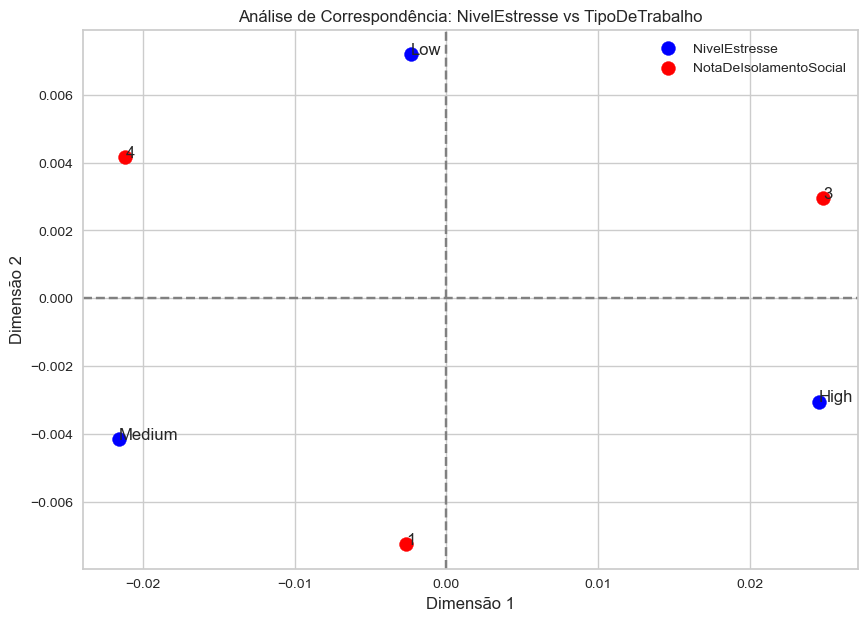

In [272]:
# Plotar coordenadas das linhas (NivelEstresse)
plt.figure(figsize=(10, 7))

# Plotando as categorias do 'NivelEstresse'
for i, (x, y) in enumerate(row_coords.values):
    plt.scatter(x, y, color='blue', label='NivelEstresse' if i == 0 else "", s=100)
    plt.text(x, y, dados['NivelEstresse'].unique()[i], fontsize=12)

# Plotando as categorias do 'TipoDeTrabalho'
for i, (x, y) in enumerate(col_coords.values):
    plt.scatter(x, y, color='red', label='NotaDeIsolamentoSocial' if i == 0 else "", s=100)
    plt.text(x, y, dados['NotaDeIsolamentoSocial'].unique()[i], fontsize=12)

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Análise de Correspondência: NivelEstresse vs TipoDeTrabalho')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.legend()
plt.show()


##### Resposta 6:

Embora a variável "nota" seja numérica, sua representação por meio de uma escala de avaliação tende a tratá-la como categórica, dado o contexto da pesquisa. Isso ocorre porque as notas refletem percepções subjetivas dos respondentes, limitando a interpretação dos dados a categorias de avaliação. Mesmo assim, ao analisar a relação entre as variáveis, não encontramos evidências de associação significativa, o que sugere que, independentemente da forma como a nota é representada, ela não impacta a relação entre as demais variáveis analisadas.

#### 7 - Funcionários que estão satisfeitos com o trabalho remoto relatam níveis mais baixos de estresse em comparação aos que estão insatisfeitos?

##### Obs:

Neste caso, o gestor solicita um filtro logo no início da pergunta: "Funcionários que estão satisfeitos com o trabalho remoto relatam níveis mais baixos de estresse em comparação aos que estão insatisfeitos?" Isso implica que precisamos focar apenas nos funcionários que trabalham remotamente. Após essa separação inicial, devemos filtrar novamente entre os grupos "satisfeitos" e "insatisfeitos" para comparar os níveis de estresse. Portanto, o primeiro passo é segmentar o dataset para essa comparação e verificar os números relevantes.

In [273]:
remoto = dados[dados['TipoDeTrabalho'] == 'Remote']
remoto.head()

,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,NivelEstresse,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
10,EMP0011,33,Non-binary,Software Engineer,Finance,17,Remote,48,3,3,High,None,Yes,Decrease,4,Satisfied,2,Weekly,Average,Oceania
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe
14,EMP0015,36,Prefer not to say,Project Manager,Retail,23,Remote,59,11,3,High,Anxiety,Yes,Decrease,5,Neutral,3,Weekly,Average,Oceania


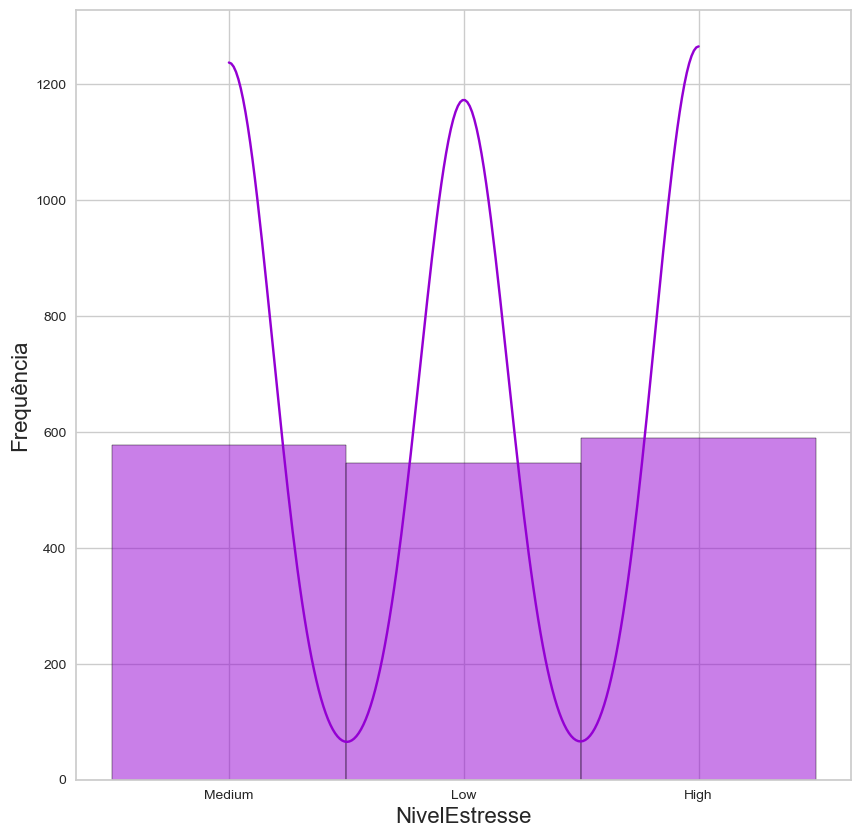

In [274]:
hist(remoto,'NivelEstresse')

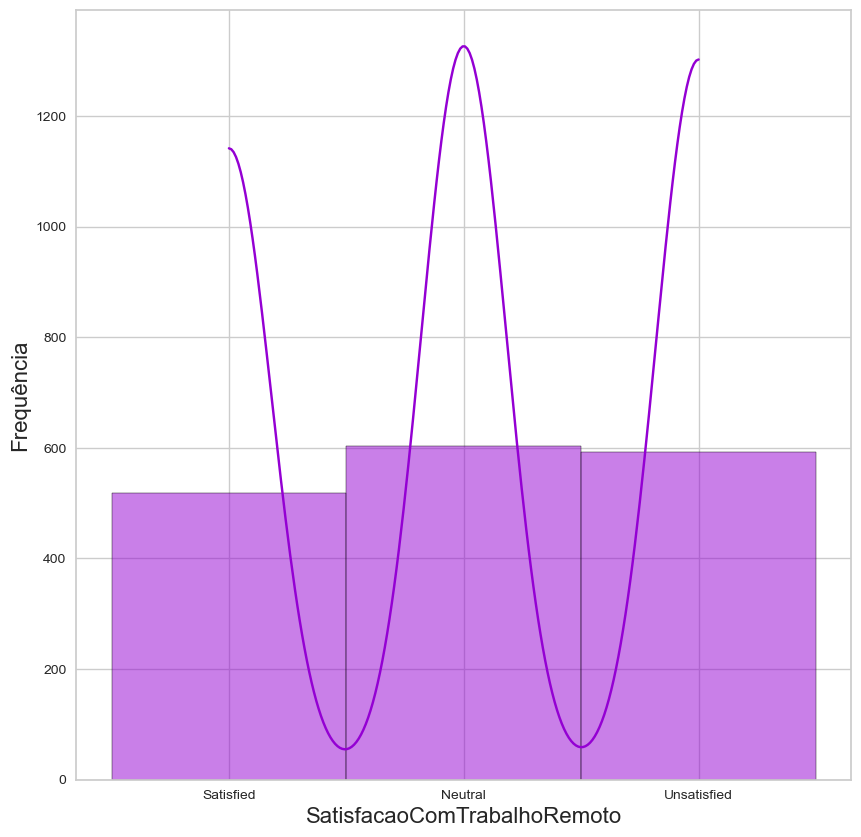

In [275]:
hist(remoto,'SatisfacaoComTrabalhoRemoto')

In [276]:
remoto['SatisfacaoComTrabalhoRemoto'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied'], dtype=object)

In [277]:
remoto['SatisfacaoComTrabalhoRemoto'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied'], dtype=object)

In [278]:
remoto_satisfeito = remoto[remoto['SatisfacaoComTrabalhoRemoto'] == 'Satisfied']
remoto_insatisfeito = remoto[remoto['SatisfacaoComTrabalhoRemoto'] == 'Unsatisfied']

print(remoto_satisfeito.shape[0],remoto_insatisfeito.shape[0])

519 592


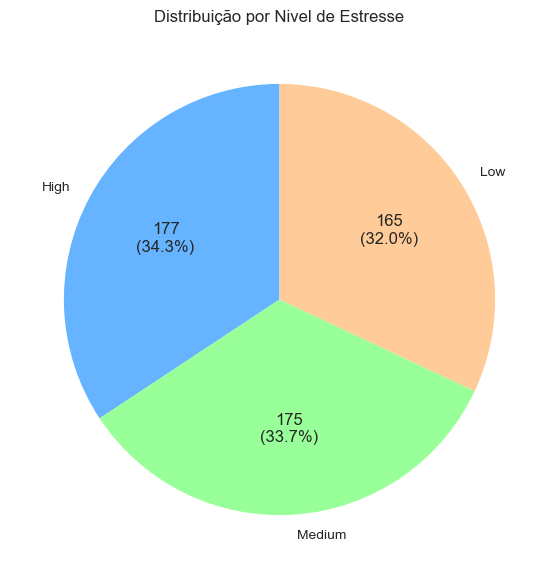

In [279]:
# Contar a quantidade de linhas por CondicoesMentais
remoto_satisfeito_counts = remoto_satisfeito['NivelEstresse'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7, 7))

# Função para formatar os rótulos
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}\n({pct:.1f}%)'

# Criar o gráfico de pizza
plt.pie(remoto_satisfeito_counts, labels=remoto_satisfeito_counts.index, autopct=lambda pct: func(pct, remoto_satisfeito_counts), 
        startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])

plt.title('Distribuição por Nivel de Estresse')
plt.show()

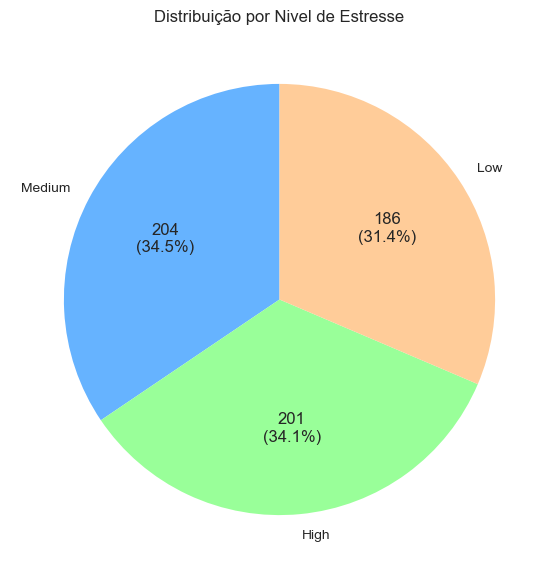

In [280]:
# Contar a quantidade de linhas por CondicoesMentais
remoto_insatisfeito_counts = remoto_insatisfeito['NivelEstresse'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7, 7))

# Função para formatar os rótulos
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}\n({pct:.1f}%)'

# Criar o gráfico de pizza
plt.pie(remoto_insatisfeito_counts, labels=remoto_insatisfeito_counts.index, autopct=lambda pct: func(pct, remoto_insatisfeito_counts), 
        startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])

plt.title('Distribuição por Nivel de Estresse')
plt.show()

##### Obs:

Ao compararmos os dados dos funcionários satisfeitos com os níveis mais altos de insatisfação em relação aos insatisfeitos, não parece haver uma diferença estatística significativa. No entanto, podemos confirmar essa observação por meio do teste Z de proporções, que nos permitirá avaliar se a diferença observada entre os grupos é estatisticamente relevante.

In [281]:
dados['SatisfacaoComTrabalhoRemoto'].unique()

array(['Unsatisfied', 'Satisfied', 'Neutral'], dtype=object)

In [282]:
count1 = dados[(dados['SatisfacaoComTrabalhoRemoto'] == 'Satisfied') & (dados['NivelEstresse'] == 'High')].shape[0]  # Pessoas com condições mentais indicadas e alto nível de estresse
n1 = dados[dados['SatisfacaoComTrabalhoRemoto'] == 'Satisfied'].shape[0]      # Total de pessoas com condições mentais indicadas
count2 = dados[(dados['SatisfacaoComTrabalhoRemoto'] == 'Unsatisfied') & (dados['NivelEstresse'] == 'High')].shape[0]  # Pessoas sem condições mentais indicadas e alto nível de estresse
n2 = dados[dados['SatisfacaoComTrabalhoRemoto'] == 'Unsatisfied'].shape[0]     # Total de pessoas sem condições mentais indicadas

# Chama a função para realizar o teste Z
teste_proporcao(count1, n1, count2, n2)

Estatística Z: -0.9678
Valor-p: 0.3331
Não há diferença significativa entre as proporções.


##### Resposta 7:

Os resultados do teste Z mostraram uma estatística Z de -0.9678, com um valor-p de 0.3331. Esses resultados indicam que não há diferença significativa entre as proporções de funcionários satisfeitos e insatisfeitos em relação aos níveis de estresse. Portanto, podemos concluir que a satisfação com o trabalho remoto não está associada a diferenças estatísticas nos níveis de estresse relatados.

#### 8 - Os funcionários que têm acesso a recursos de saúde mental apresentam níveis mais baixos de estresse?

In [283]:
dados.head()

,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,NivelEstresse,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


##### Obs:

Para responder a essa pergunta, é necessário aplicar um filtro nos dados. Precisamos analisar se as pessoas que possuem acesso a recursos de saúde mental, referidas como "PlanoDeSaude", apresentam níveis de estresse mais baixos em comparação àquelas que não têm acesso a esses recursos.

In [284]:
TemPlano = dados[dados['PlanoDeSaude'] == 'Yes']
NaoTemPlano = dados[dados['PlanoDeSaude'] == 'No']

print('Tem plano de saúde: ',TemPlano.shape[0])
print('Não Tem plano de saúde: ',NaoTemPlano.shape[0])

Tem plano de saúde:  2447
Não Tem plano de saúde:  2553


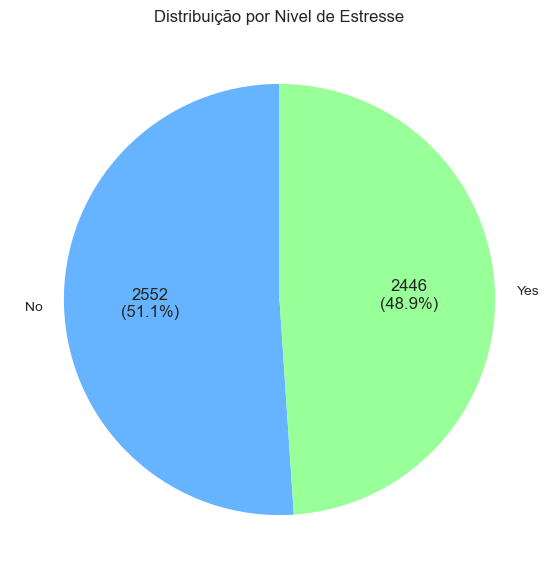

In [285]:
# Contar a quantidade de linhas por CondicoesMentais
dados_counts = dados['PlanoDeSaude'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7, 7))

# Função para formatar os rótulos
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}\n({pct:.1f}%)'

# Criar o gráfico de pizza
plt.pie(dados_counts, labels=dados_counts.index, autopct=lambda pct: func(pct, dados_counts), 
        startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])

plt.title('Distribuição por Nivel de Estresse')
plt.show()

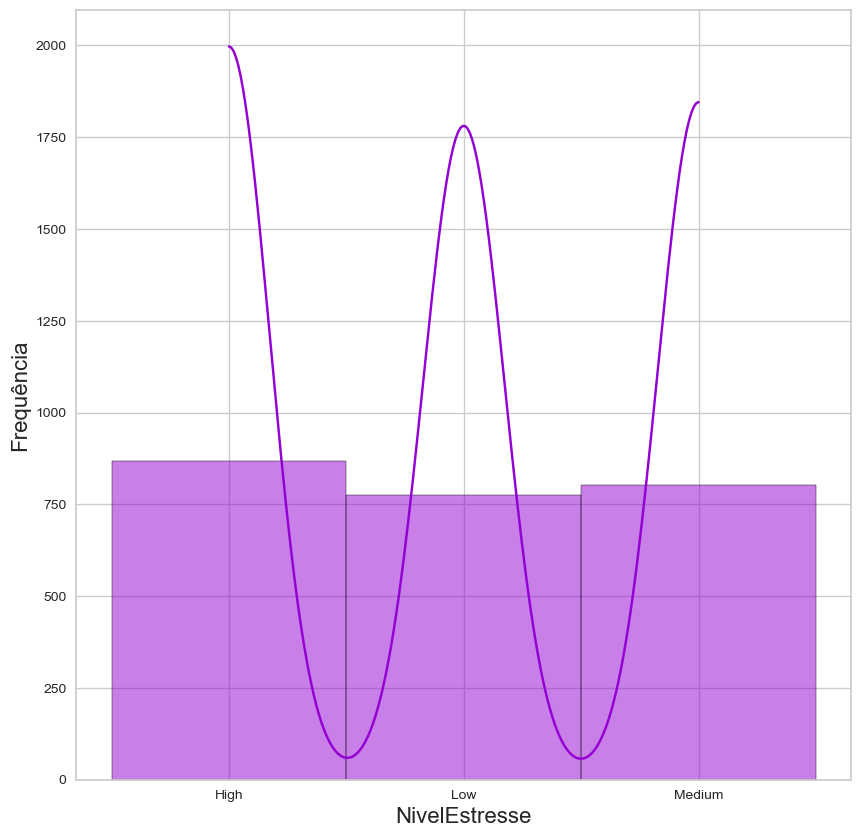

In [286]:
hist(TemPlano,'NivelEstresse')

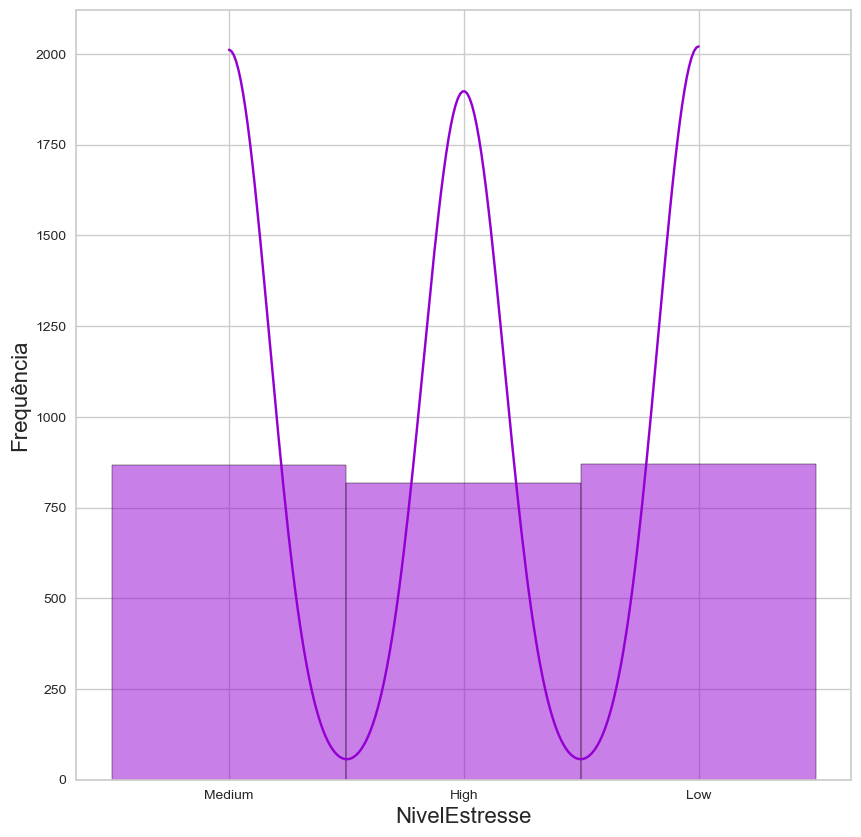

In [287]:
hist(NaoTemPlano,'NivelEstresse')

##### Obs:

Vamos utilizar novamente a metodologia do teste Z de proporções para validar a diferença entre os níveis de estresse de funcionários que possuem Plano de Saúde e aqueles que não têm. Esse teste nos permitirá verificar estatisticamente se existe uma diferença significativa entre esses dois grupos.

In [288]:
count1 = dados[(dados['PlanoDeSaude'] == 'Yes') & (dados['NivelEstresse'] == 'High')].shape[0]  
n1 = dados[dados['PlanoDeSaude'] == 'Yes'].shape[0]      
count2 = dados[(dados['PlanoDeSaude'] == 'No') & (dados['NivelEstresse'] == 'High')].shape[0]  
n2 = dados[dados['PlanoDeSaude'] == 'No'].shape[0]     

# Chama a função para realizar o teste Z
teste_proporcao(count1, n1, count2, n2)

Estatística Z: 2.6254
Valor-p: 0.0087
Há uma diferença significativa entre as proporções.


In [289]:
p1 = (count1/n1) * 100
p2 = (count2/n2) * 100

print(f'{n1} tem Plano de Saúde, desses {n1}, {count1} tem níveis altos de estresse, gerando um resultado proporcional de {p1:.2f}')
print(f'{n2} tem Plano de Saúde, desses {n2}, {count2} tem níveis altos de estresse, gerando um resultado proporcional de {p2:.2f}')

2447 tem Plano de Saúde, desses 2447, 869 tem níveis altos de estresse, gerando um resultado proporcional de 35.51
2553 tem Plano de Saúde, desses 2553, 817 tem níveis altos de estresse, gerando um resultado proporcional de 32.00


##### Resposta 8:

A Estatística Z obtida foi de 2.6254, com um valor-p de 0.0087. Esses resultados indicam que há uma diferença significativa entre as proporções de níveis de estresse entre os funcionários que possuem Plano de Saúde e aqueles que não têm. O valor-p abaixo de 0.01 sugere que a presença de recursos de saúde mental está associada a níveis de estresse mais baixos, confirmando a hipótese de que o acesso a esses recursos pode impactar positivamente o bem-estar dos funcionários.

#### Modelagem

In [290]:
dados.head()

,IdColaborador,Idade,Gender,Função,Industria,AnosDeExperiencia,TipoDeTrabalho,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,NivelEstresse,CondicoesMentais,PlanoDeSaude,MudancaProdutividade,NotaDeIsolamentoSocial,SatisfacaoComTrabalhoRemoto,SuporteDaEmpresaComTrabalhoRemoto,AtividadeFisica,QualidadeSono,Regiao
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [291]:
x = dados.drop(columns= ['IdColaborador','NivelEstresse'])
y = dados['NivelEstresse']


##### Obs:

Estamos criando variáveis dummies para transformar as colunas categóricas do DataFrame em valores numéricos, o que é essencial para aplicar a maioria dos algoritmos de machine learning e modelos estatísticos. Esses modelos geralmente só trabalham com variáveis numéricas, então precisamos converter as categorias, como "Gênero" ou "Indústria", em um formato que os modelos possam processar.

In [292]:
# Criando as variáveis dummies
x = pd.get_dummies(x, 
                   columns=['Gender', 'Função', 'Industria', 'TipoDeTrabalho', 'CondicoesMentais', 'PlanoDeSaude',
                            'MudancaProdutividade', 'SatisfacaoComTrabalhoRemoto', 'AtividadeFisica', 'QualidadeSono', 'Regiao'],
                   prefix_sep='_', 
                   drop_first=True, 
                   dtype='int64')

# Mostrando as primeiras linhas do DataFrame resultante
x.head()


,Idade,AnosDeExperiencia,HorasSemanais,QtdReunioes,EquilibroVidaTrabalho,NotaDeIsolamentoSocial,SuporteDaEmpresaComTrabalhoRemoto,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,...,SatisfacaoComTrabalhoRemoto_Unsatisfied,AtividadeFisica_None,AtividadeFisica_Weekly,QualidadeSono_Good,QualidadeSono_Poor,Regiao_Asia,Regiao_Europe,Regiao_North America,Regiao_Oceania,Regiao_South America
0,32,13,47,7,2,1,1,0,1,0,...,1,0,1,1,0,0,1,0,0,0
1,40,3,52,4,1,3,2,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,59,22,46,11,5,4,5,0,1,0,...,1,1,0,0,1,0,0,1,0,0
3,27,20,32,8,4,3,3,1,0,0,...,1,1,0,0,1,0,1,0,0,0
4,49,32,35,12,2,3,3,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [293]:
# Separando os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [294]:
naive_estresse = GaussianNB()
naive_estresse.fit(X_train,y_train)

GaussianNB()

In [295]:
naive_estresse.class_count_

array([1355., 1324., 1321.])

In [296]:
naive_estresse.class_prior_

array([0.33875, 0.331  , 0.33025])

In [297]:
from sklearn.metrics import accuracy_score

previsoes = naive_estresse.predict(X_test)
accuracy_score(y_test,previsoes)

0.317

c:\Users\bruno\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


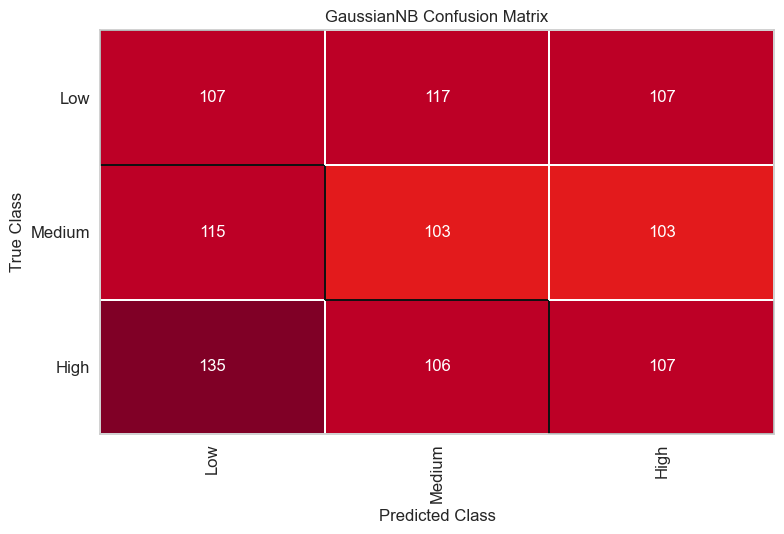

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [298]:
from yellowbrick.classifier import ConfusionMatrix
# Visualizar a matriz de confusão
visualizer = ConfusionMatrix(naive_estresse, classes=['Low', 'Medium', 'High'])  # Ajuste as classes conforme seu dataset

# Ajustar o visualizador aos dados de treino
visualizer.fit(X_train, y_train)

# Gerar previsões e exibir a matriz de confusão nos dados de teste
visualizer.score(X_test, y_test)

# Mostrar o gráfico
visualizer.show()

#### Interpretação do modelo:

A acurácia de 0.317 significa que o modelo Naive Bayes acertou aproximadamente 31,7% das previsões no conjunto de teste. Em outras palavras, de todas as previsões feitas pelo modelo, apenas 31,7% estão corretas. Uma acurácia de 31,7% é bastante baixa, indicando que o modelo não está performando bem na tarefa de prever o nível de estresse com base nos dados fornecidos. O Naive Bayes pode não ser o melhor modelo para essa tarefa específica. Outros algoritmos, que não assumam independência entre variáveis, como árvores de decisão ou Random Forest podem fornecer melhores resultados.